In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

# Preprocessing

In [2]:
from utils.preprocessing import preprocess, split
datasetname = "JSB_Chorales"
datapath = "../data/"+datasetname+'/'
dataset, sizes, dictionaries = preprocess(datapath)
k_folds = 5
splitted = split(dataset, k_folds)

Processing 1
Processing 10
Processing 100
Processing 101
Processing 102
Processing 103
Processing 104
Processing 105
Processing 106
Processing 107
Processing 108
Processing 109
Processing 11
Processing 110
Processing 111
Processing 112
Processing 113
Processing 114
Processing 115
Processing 116
Processing 117
Processing 118
Processing 119
Processing 12
Processing 120
Processing 122
Processing 123
Processing 124
Processing 125
Processing 126
Processing 127
Processing 128
Processing 129
Processing 13
Processing 130
Processing 131
Processing 132
Processing 134
Processing 135
Processing 136
Processing 137
Processing 138
Processing 139
Processing 14
Processing 140
Processing 141
Processing 142
Processing 143
Processing 144
Processing 145
Processing 146
Processing 147
Processing 148
Processing 149
Processing 15
Processing 150
Processing 151
Processing 152
Processing 153
Processing 154
Processing 155
Processing 156
Processing 157
Processing 158
Processing 159
Processing 16
Processing 160
Proc

In [3]:
print sizes
print sorted(set([]).union(*(set(dataset['tseqs'][i]) for i in range(len(dataset['tseqs'])))))
print sorted(set([]).union(*(set(dataset['dTseqs'][i]) for i in range(len(dataset['dTseqs'])))))
print sorted(set([]).union(*(set(dataset['pitchseqs'][i]) for i in range(len(dataset['pitchseqs'])))))

(25, 25, 54)
[12, 15, 17, 18, 19, 20, 21, 22, 23, 24]
[0, 12, 15, 17, 18, 19, 20, 21, 22]
[0, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53]


# Evaluation

In [4]:
from models.ingram import INgram
from models.fungram import FUNgram
from utils.evaluation import compare_models

modelsDic = {'ingram': (INgram, {'order':4}),
            'fungram': (FUNgram, {'order': 12, 'sizes': sizes})}

models, metrics = compare_models(splitted, modelsDic)

0.330018291243
8.68742808545
0.340325123986
9.03278059563
0.340028386074
8.85192049944
0.333359354826
8.60485926213
0.337231413762
9.04295977449
2.16111841747
6.63012203158
2.13590525777
7.00355403667
2.12203240271
6.8374898202
2.15449252574
6.65812402348
2.16786353677
7.0331196299


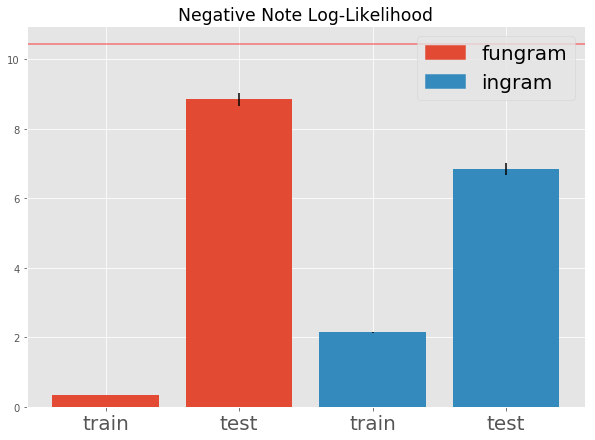

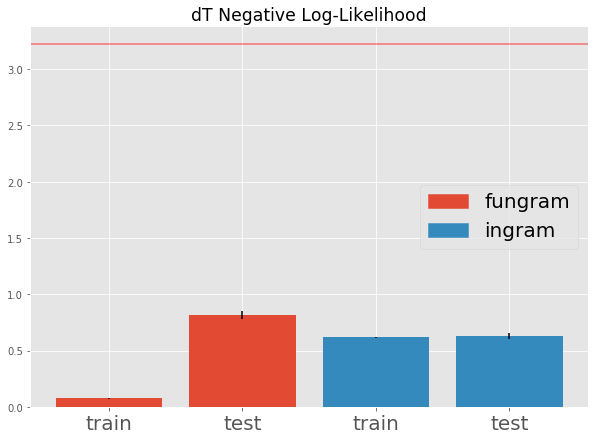

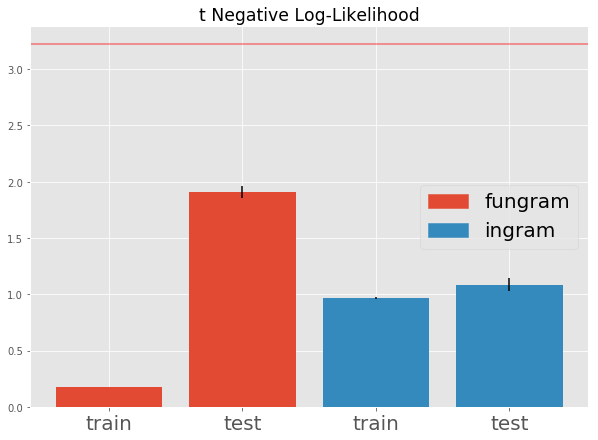

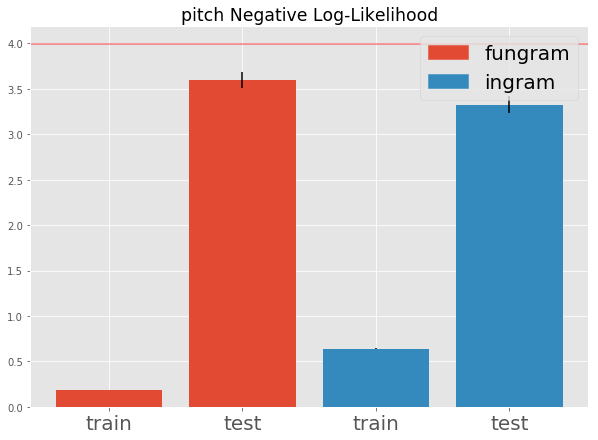

In [13]:
from utils.evaluation import plot_metric
from math import log
plot_metric(metrics, 'NLL_global', "Negative Note Log-Likelihood", uniform=log((25*25*54)))
plot_metric(metrics, 'NLL_dT', "dT Negative Log-Likelihood", uniform=log(25.))
plot_metric(metrics, 'NLL_t', "t Negative Log-Likelihood", uniform=log(25.))
plot_metric(metrics, 'NLL_pitch', 'pitch Negative Log-Likelihood', uniform=log(54.))

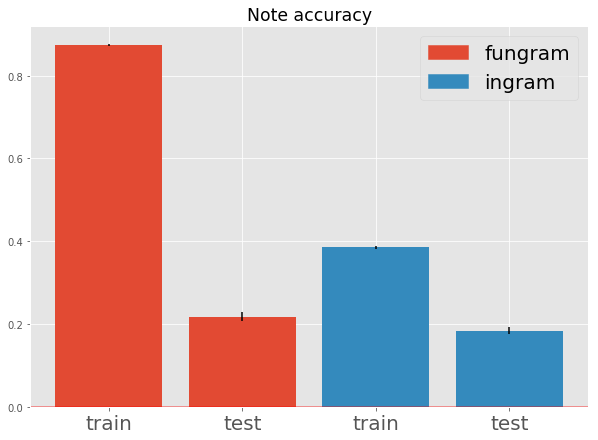

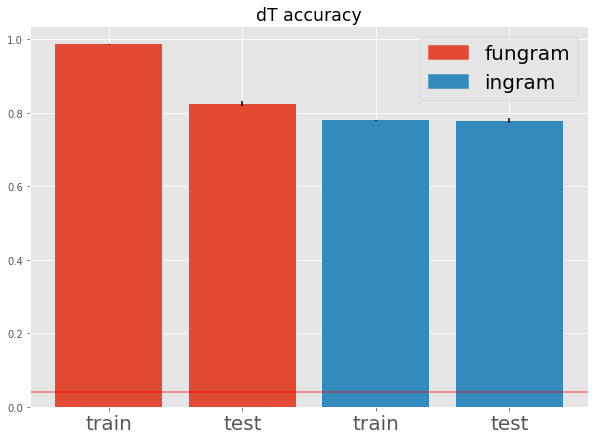

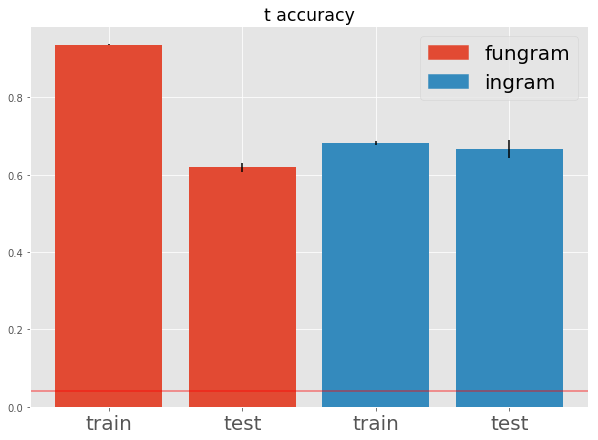

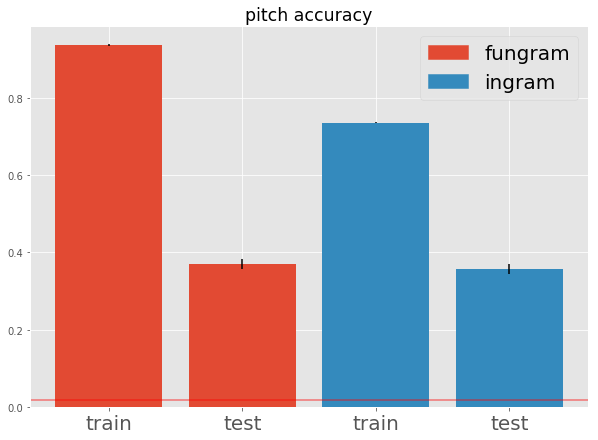

In [14]:
plot_metric(metrics, 'accuracy_global', "Note accuracy", uniform = 1./(25*25*54))
plot_metric(metrics, 'accuracy_dT', "dT accuracy", uniform = 1./25)
plot_metric(metrics, 'accuracy_t', "t accuracy", uniform = 1./25)
plot_metric(metrics, 'accuracy_pitch', 'pitch accuracy', uniform = 1./54)

# Generation

In [5]:
import numpy as np
i = np.argmax(metrics['fungram']['test']['accuracy_global'])
print(i)
model = models['fungram'][i]
gen_data = model.generate(n_songs=5, write_MIDI=True, dictionaries=dictionaries, path=datapath+"gen/")

3


defaultdict(<type 'float'>, {0: 9785.0, 1: 109.0, 2: 605.0, 3: 11112.0, 4: 10687.0, 5: 4117.0, 6: 1664.0, 7: 7142.0, 8: 6635.0, 9: 6229.0, 10: 547.0, 11: 98.0})


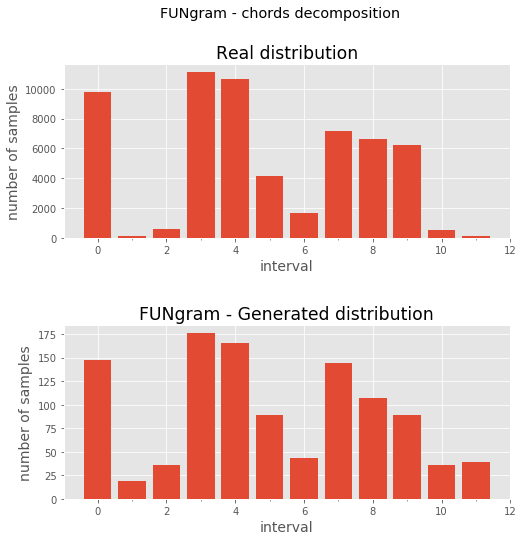

In [31]:
from utils.evaluation import analyze_chords
analyze_chords(dataset, gen_data, title_prefix="FUNgram")

defaultdict(<type 'float'>, {0: 1867.0, 1: 1062.0, 2: 2638.0, 3: 1145.0, 4: 856.0, 5: 2434.0, 6: 703.0, 7: 3503.0, 8: 982.0, 9: 925.0, 10: 1849.0, 11: 1767.0})


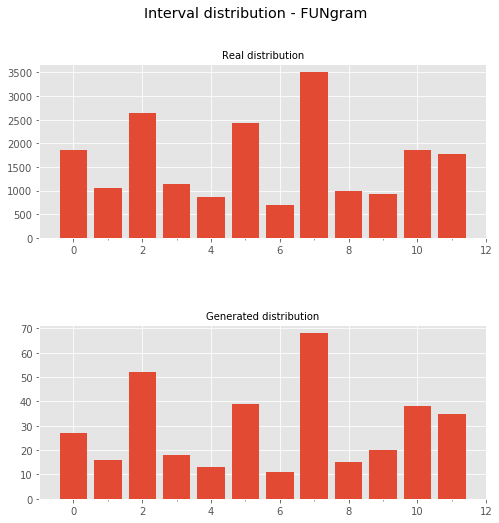

In [21]:
from utils.evaluation import analyze_intervals
analyze_intervals(dataset, gen_data, title="Interval distribution - FUNgram")

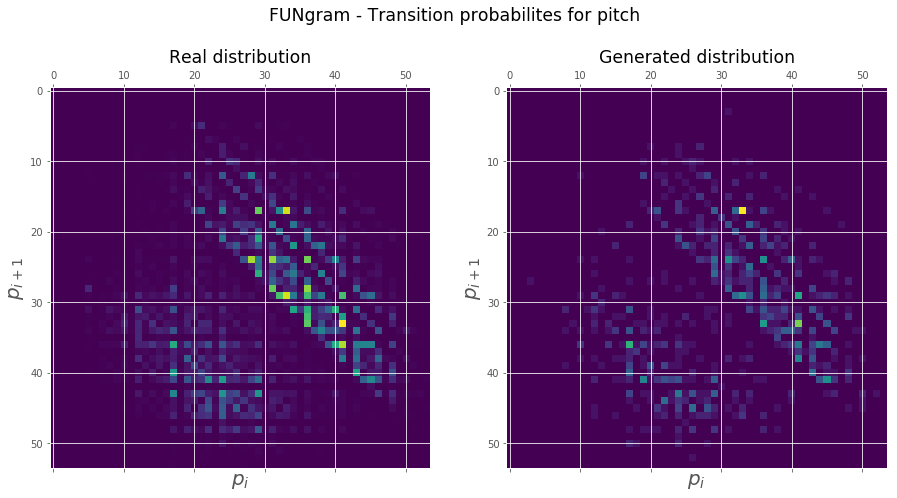

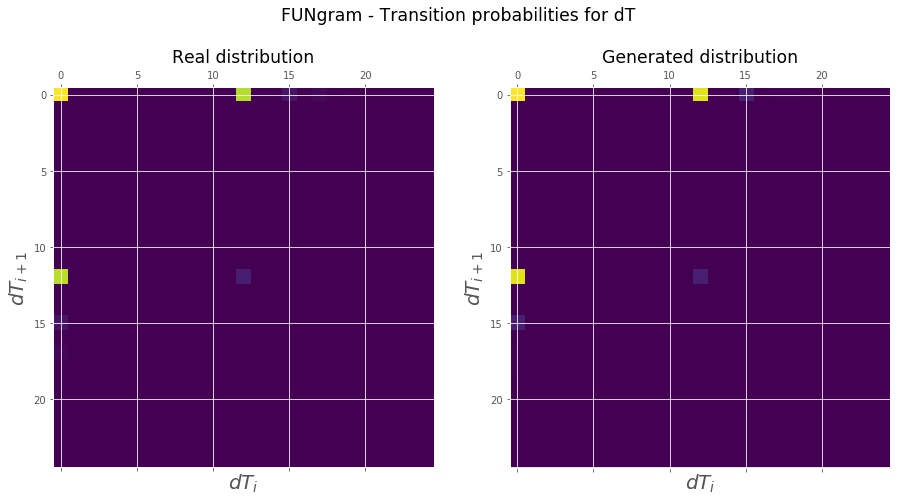

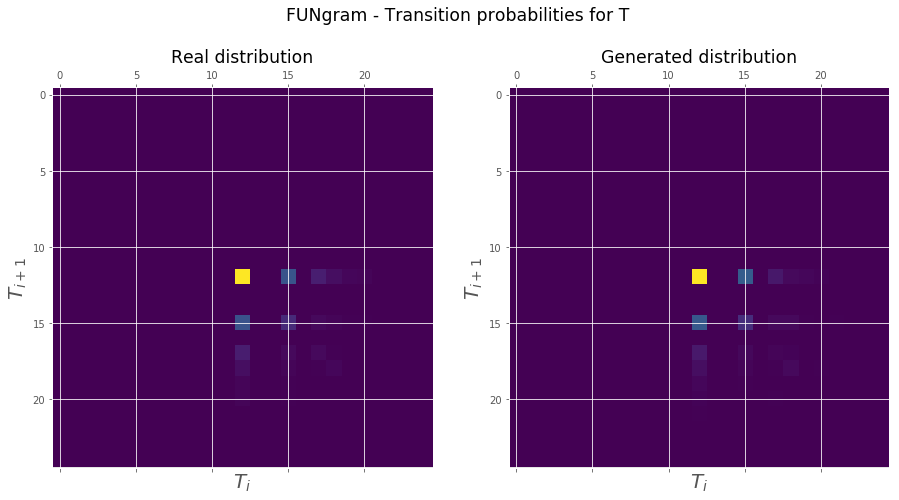

In [19]:
from utils.evaluation import analyze_transitions
analyze_transitions(dataset, gen_data, sizes, title_prefix="FUNgram - ")

In [26]:
i = np.argmax(metrics['ingram']['test']['accuracy_global'])
print(i)
model = models['ingram'][i]
gen_data = model.generate(n_songs=5, write_MIDI=True, dictionaries=dictionaries, path=datapath+'gen/')

0


In [27]:
from utils.sequenceCounter import metric_compare
print(metric_compare(dataset, gen_data))
print(metric_compare(dataset["dTseqs"], gen_data["dTseqs"]))
print(metric_compare(dataset["pitchseqs"], gen_data["pitchseqs"]))

{8: 0.0010362694300518134, 16: 0.0, 2: 0.4150753768844221, 4: 0.03147208121827411, 32: 0.0}
{8: 0.9886010362694301, 16: 0.7794594594594595, 2: 1.0, 4: 1.0, 32: 0.0378698224852071}
{8: 0.49533678756476685, 16: 0.0627027027027027, 2: 1.0, 4: 1.0, 32: 0.001183431952662722}


defaultdict(<type 'float'>, {0: 9785.0, 1: 109.0, 2: 605.0, 3: 11112.0, 4: 10687.0, 5: 4117.0, 6: 1664.0, 7: 7142.0, 8: 6635.0, 9: 6229.0, 10: 547.0, 11: 98.0})


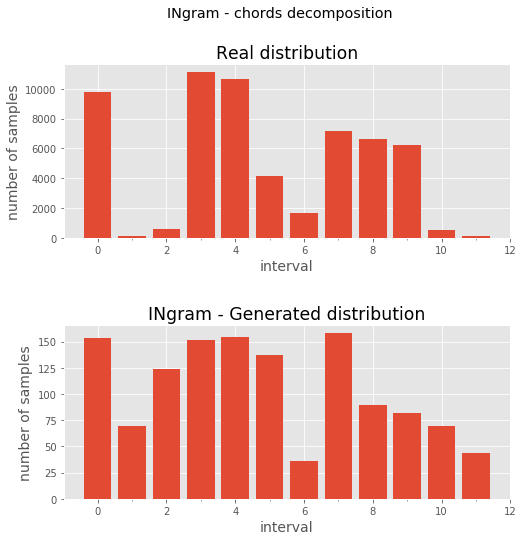

In [29]:
from utils.evaluation import analyze_chords
analyze_chords(dataset, gen_data, title_prefix="INgram")

defaultdict(<type 'float'>, {0: 1867.0, 1: 1062.0, 2: 2638.0, 3: 1145.0, 4: 856.0, 5: 2434.0, 6: 703.0, 7: 3503.0, 8: 982.0, 9: 925.0, 10: 1849.0, 11: 1767.0})


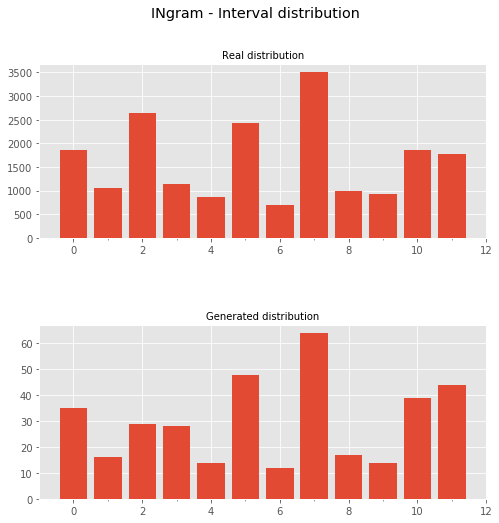

In [35]:
from utils.evaluation import analyze_intervals
analyze_intervals(dataset, gen_data, title="INgram - Interval distribution")

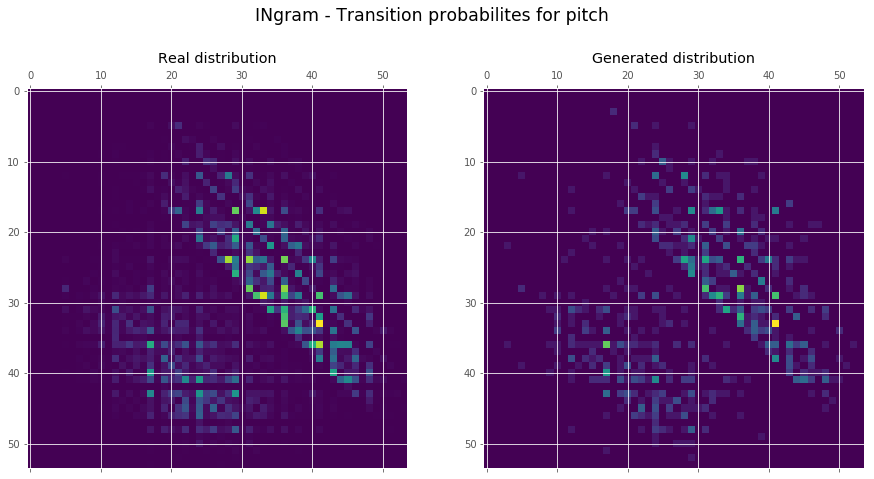

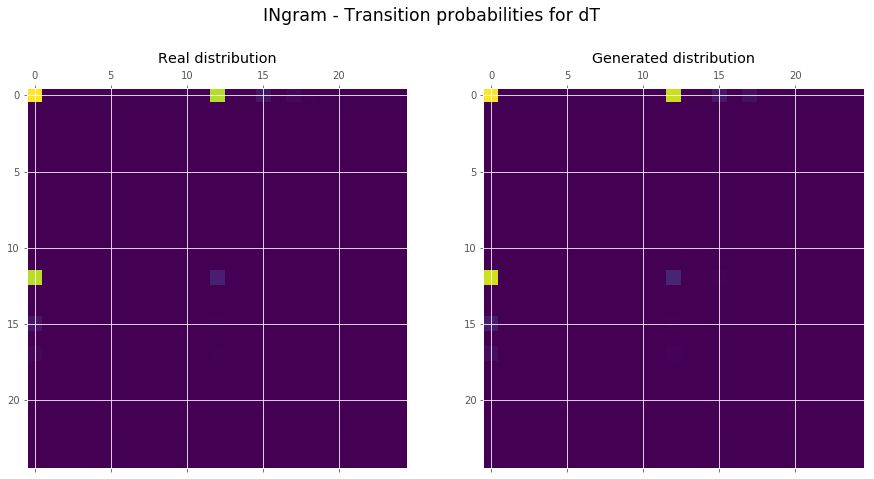

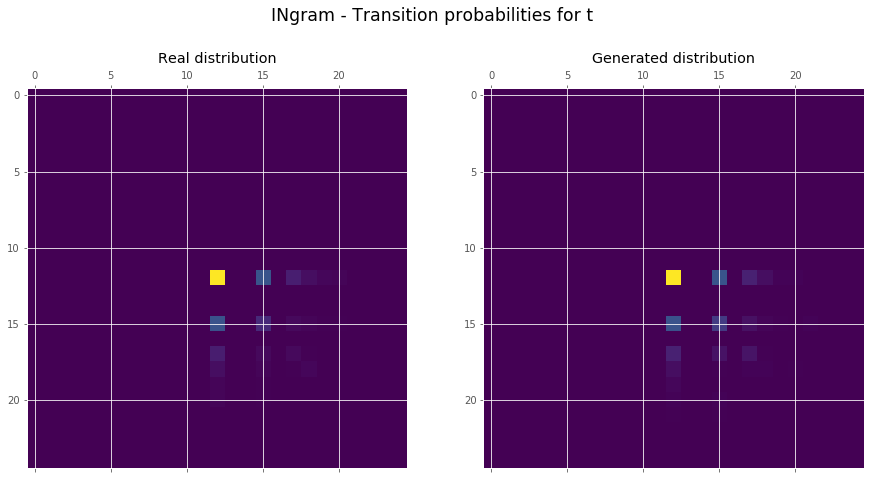

In [31]:
from utils.evaluation import analyze_transitions
analyze_transitions(dataset, gen_data, sizes, title_prefix="INgram - ")

In [18]:
print(dictionaries)
print(dictionaries.keys())

{'dtseqs': [0.0, 0.041666666666666664, 0.08333333333333333, 0.125, 0.16666666666666666, 0.1875, 0.25, 0.3333333333333333, 0.375, 0.5, 0.6666666666666666, 0.75, 1.0, 1.3333333333333333, 1.5, 2.0, 2.6666666666666665, 3.0, 4.0, 5.333333333333333, 6.0, 8.0, 12.0, 16.0, 24.0], 'duration_text': ['0', '32)3', '16)3', '32', '8)3', '32.', '16', '4)3', '16.', '8', '2)3', '8.', '4', '1)3', '4.', '2', '.5)3', '2.', '1', '.25)3', '1.', '.5', '.5.', '.25', '.25.'], 'Tseqs': [0.0, 0.041666666666666664, 0.08333333333333333, 0.125, 0.16666666666666666, 0.1875, 0.25, 0.3333333333333333, 0.375, 0.5, 0.6666666666666666, 0.75, 1.0, 1.3333333333333333, 1.5, 2.0, 2.6666666666666665, 3.0, 4.0, 5.333333333333333, 6.0, 8.0, 12.0, 16.0, 24.0], 'pitch_text': ['G3', 'G#3', 'A3', 'bB3', 'B3', 'C4', 'C#4', 'D4', 'D#4', 'E4', 'F4', 'F#4', 'G4', 'G#4', 'A4', 'bB4', 'B4', 'C5', 'C#5', 'D5', 'D#5', 'E5', 'F5', 'F#5', 'G5', 'G#5', 'A5', 'bB5', 'B5', 'C6', 'C#6', 'D6', 'D#6', 'E6', 'F6', 'F#6', 'G6', 'G#6', 'A6', 'bB6', '

### Novelty

In [5]:
model = models['fungram'][0]
gen_data_fungram12 = model.generate(n_songs=20, write_MIDI=True, dictionaries=dictionaries, path=datapath+"gen/")

model = models['ingram'][0]
gen_data_ingram4 = model.generate(n_songs=20, write_MIDI=True, dictionaries=dictionaries, path=datapath+"gen/")

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database',)).History will not be written to the database.


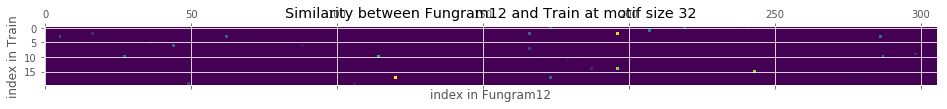

In [8]:
from utils.noveltyPlus import novelty_analysis
sim = novelty_analysis(gen_data_fungram12, splitted[0]["train"], [32], "Fungram12", "Train")

In [13]:
# Get 5 biggest values
import numpy as np
similarity = sim
biggest = np.argsort(similarity[:,:,-1], axis=None)
print biggest.shape


(6120,)


In [16]:
biggest = biggest[-5:]
biggest = [(n//similarity.shape[1], n%similarity.shape[1]) for n in biggest]
print biggest
print [similarity[b] for b in biggest]

[(10, 114), (14, 196), (15, 243), (2, 196), (17, 120)]
[array([0.27848101]), array([0.35897436]), array([0.36036036]), array([0.4017094]), array([0.425])]


Build hash set in 9.67213702202s
Comparison FUNgram12 in 0.824380874634s
Comparison validation in 2.34174895287s
Comparison INgram4 in 0.793051958084s


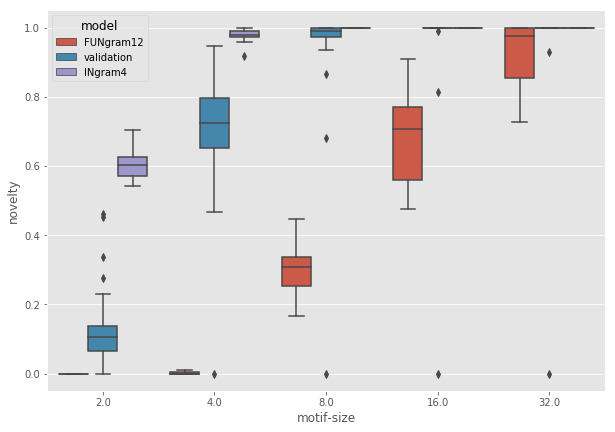

In [33]:
from utils.novelty import comparison_novelties

comparison_novelties(splitted[0]["train"], [gen_data_fungram12, splitted[0]["test"], gen_data_ingram4], 
                     ["FUNgram12", "validation", "INgram4"])